<a href="https://colab.research.google.com/github/agwboxer/Dissertation/blob/main/backend/detector/training_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
RAM                 12.67 GB
Disk                33.2/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 1.26.4<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu124>=1.8.0
torch               ✅ 2.5.1+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu124>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="*****")
project = rf.workspace("alex-boxer").project("dissertation-object-detection-training-dataset")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dissertation-object-detection-training-dataset-2 in yolov8:: 100%|██████████| 44/44 [00:00<00:00, 6404.41it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=7 imgsz=640

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dissertation-object-detection-training-dataset-2/data.yaml, epochs=7, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [4]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/dissertation-object-detection-training-dataset-2/data.yaml


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/dissertation-object-detection-training-dataset-2/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.94it/s]
                   all          5          5    0.00337          1    0.00946    0.00663
Speed: 0.4ms preprocess, 46.1ms inference, 0.0ms loss, 31.8ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


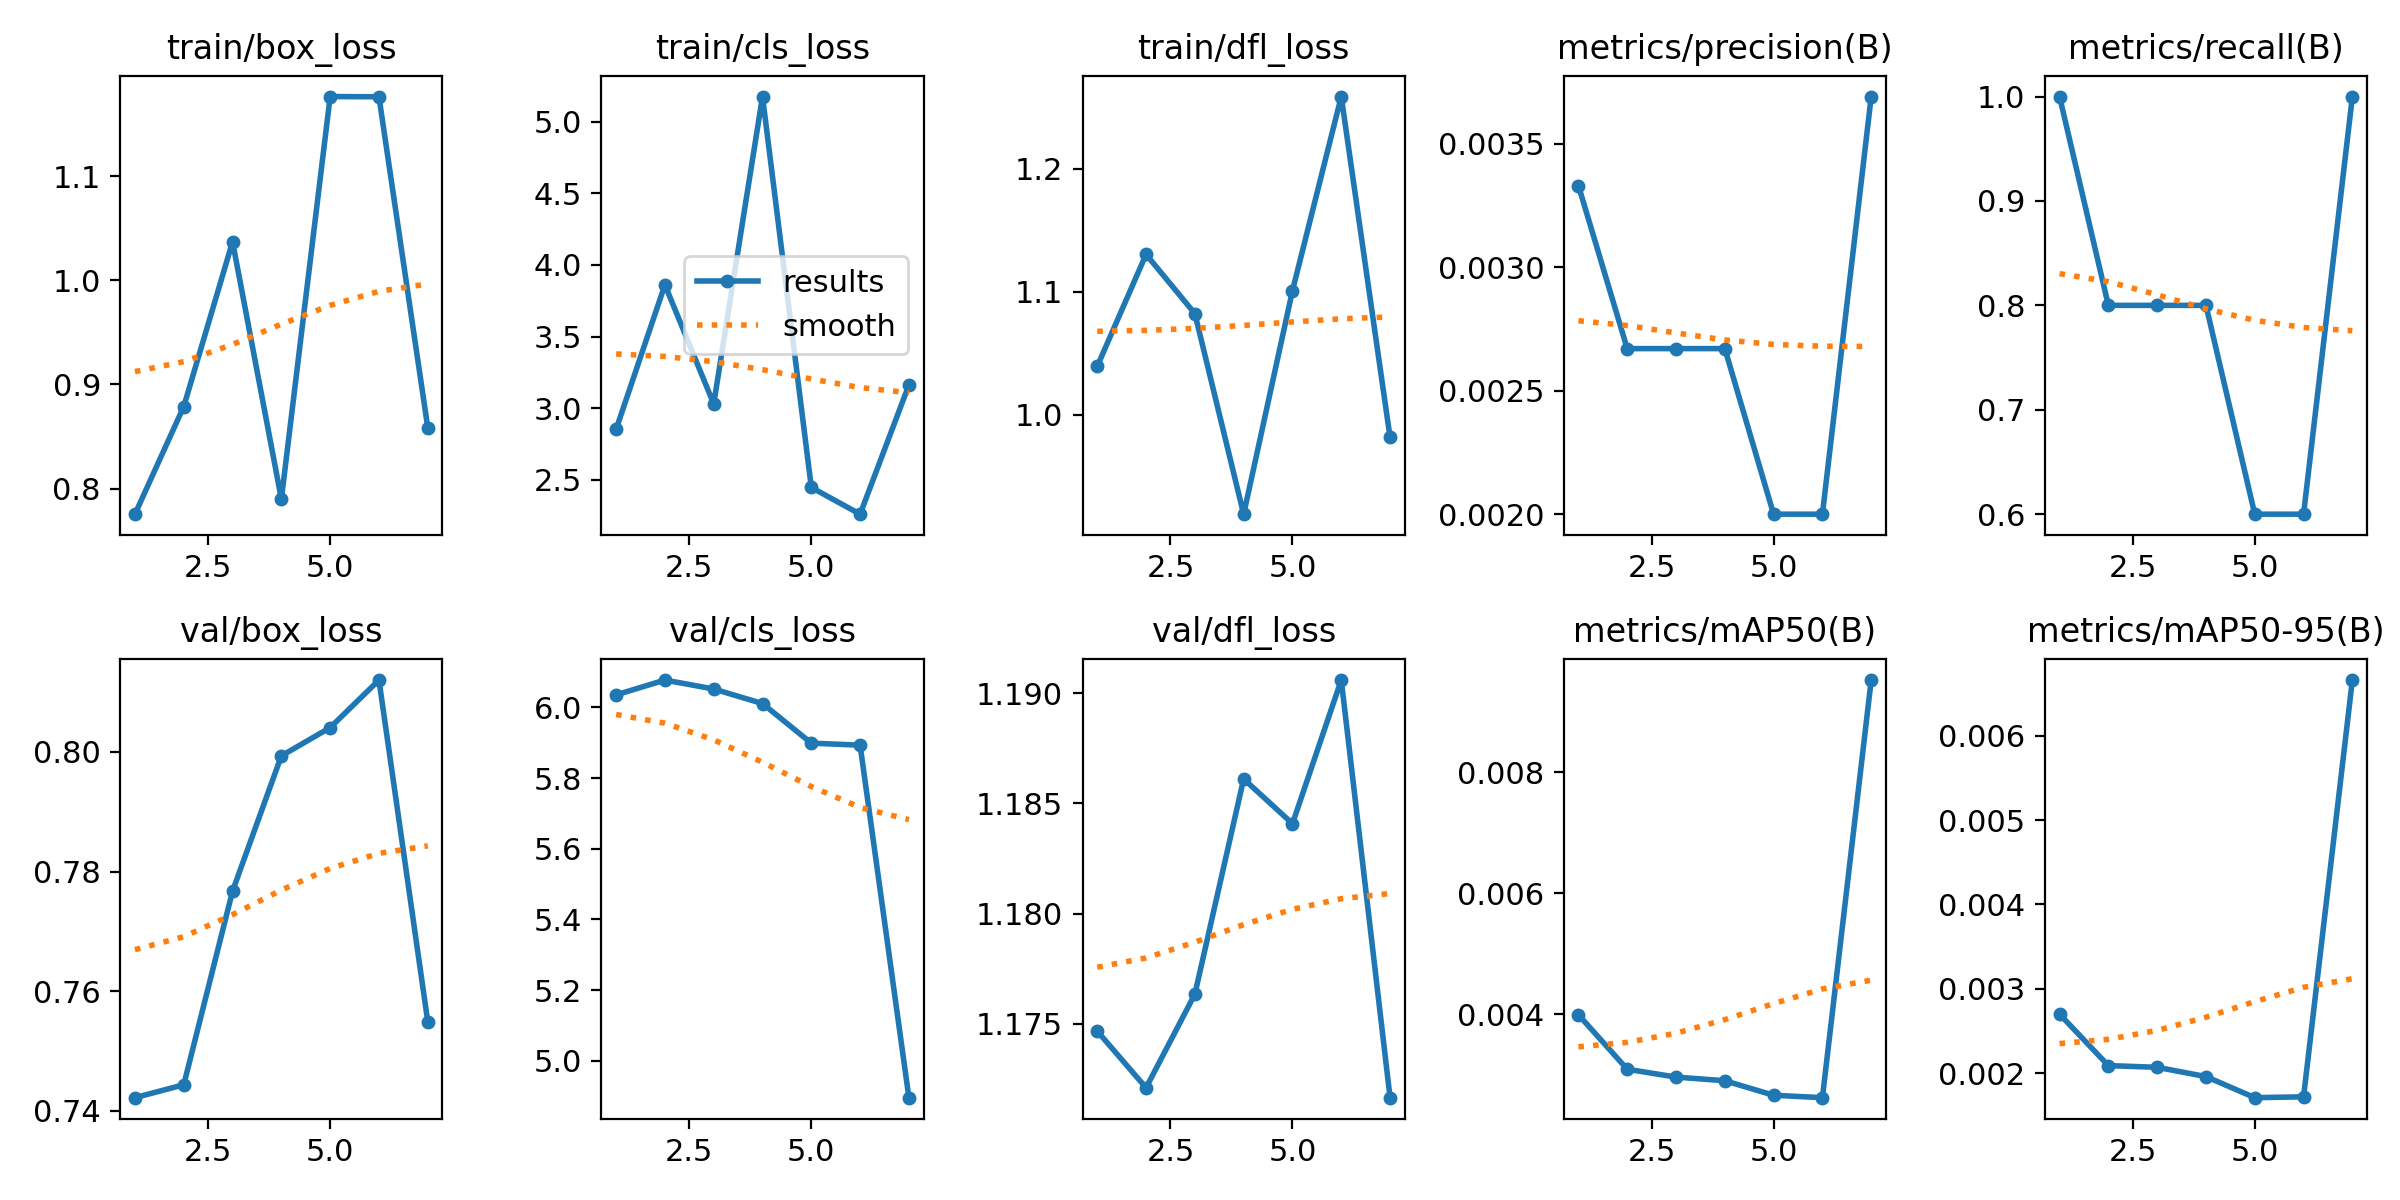

In [14]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [7]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/runs/predict

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/14 /content/runs/predict/frame_0133.jpg: 384x640 2 Bobs, 57.5ms
image 2/14 /content/runs/predict/frame_0134.jpg: 384x640 1 Bob, 25.2ms
image 3/14 /content/runs/predict/frame_0135.jpg: 384x640 2 Bobs, 25.1ms
image 4/14 /content/runs/predict/frame_0136.jpg: 384x640 (no detections), 25.2ms
image 5/14 /content/runs/predict/frame_0137.jpg: 384x640 (no detections), 25.1ms
image 6/14 /content/runs/predict/frame_0138.jpg: 384x640 (no detections), 25.1ms
image 7/14 /content/runs/predict/frame_0139.jpg: 384x640 1 Bob, 23.5ms
image 8/14 /content/runs/predict/frame_0140.jpg: 384x640 2 Bobs, 16.0ms
image 9/14 /content/runs/predict/frame_0141.jpg: 384x640 1 Bob, 16.0ms
image 10/14 /content/runs/predict/frame_0142.jpg: 384x640 1 Bob, 16.1ms
image 11/14 /content/runs/predict/frame_0143.jpg: 384x640 (no detections), 15.7ms
image 12

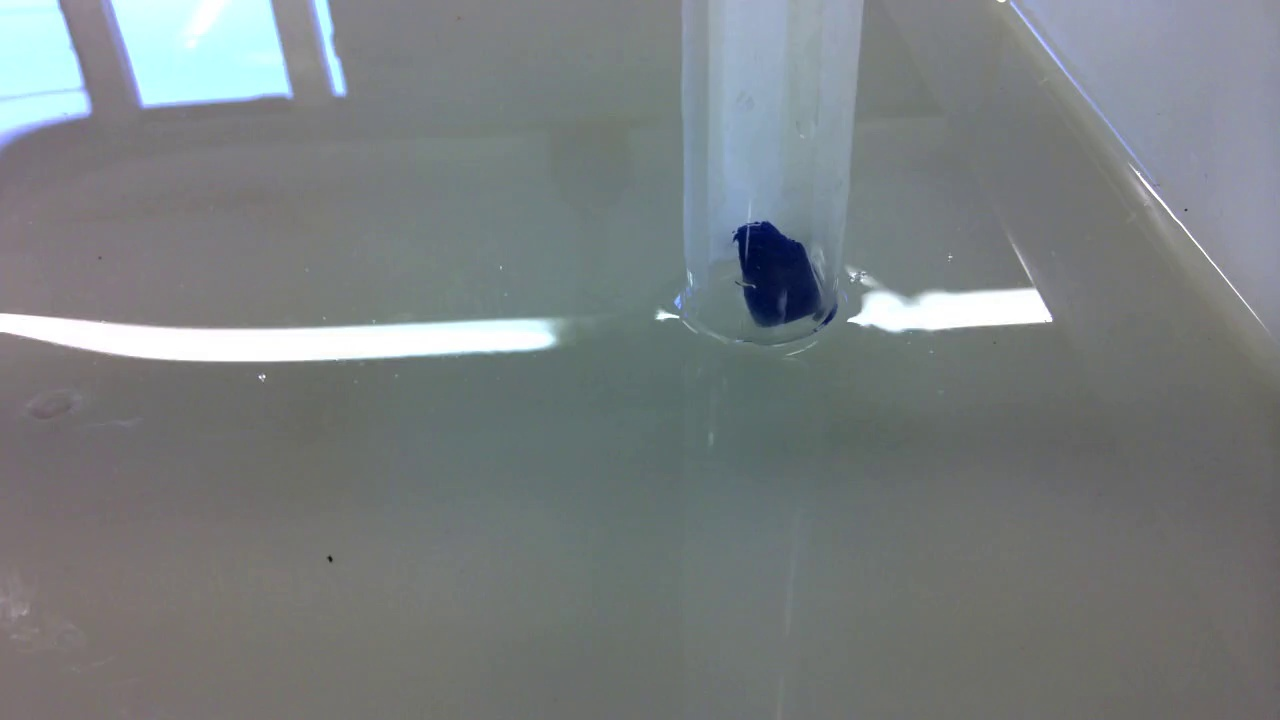

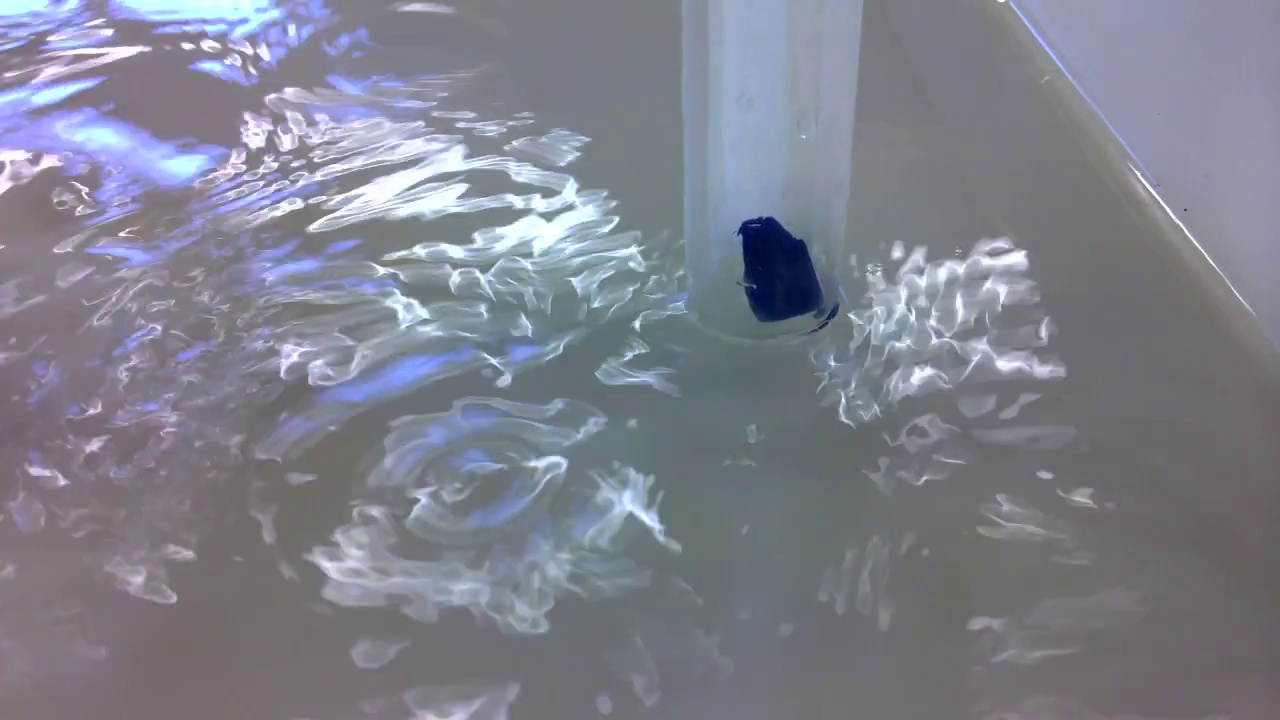

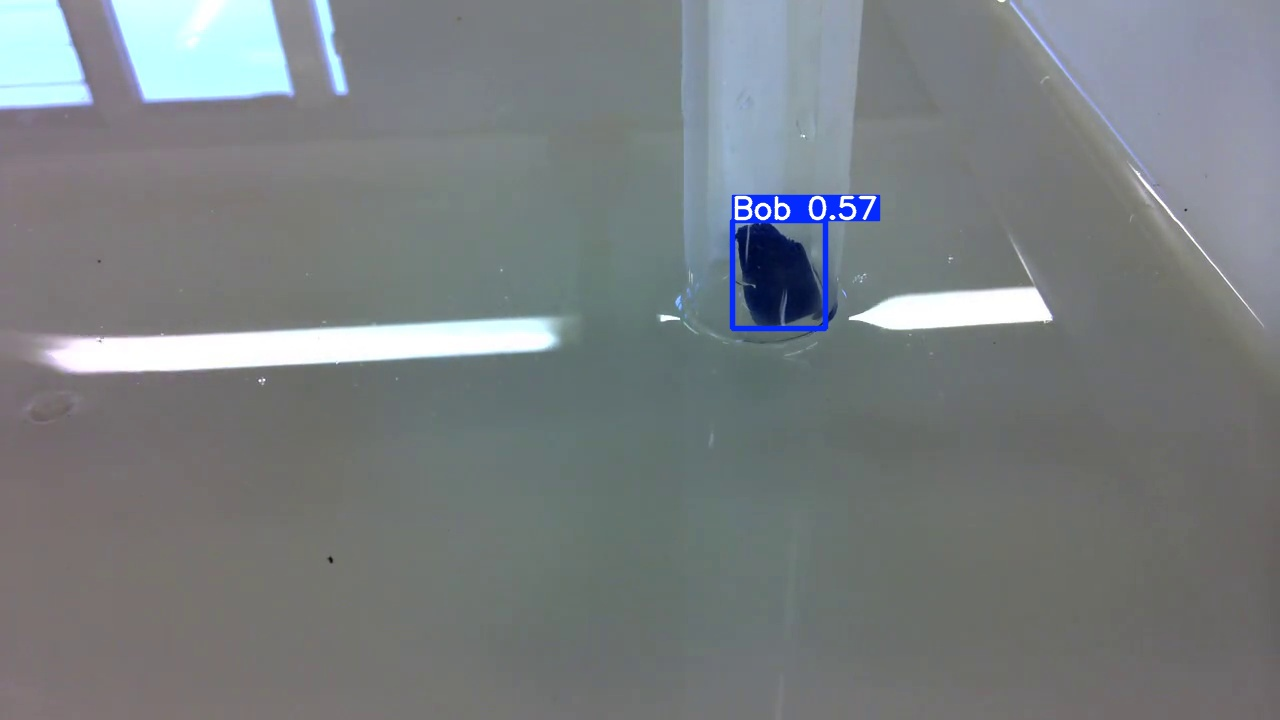

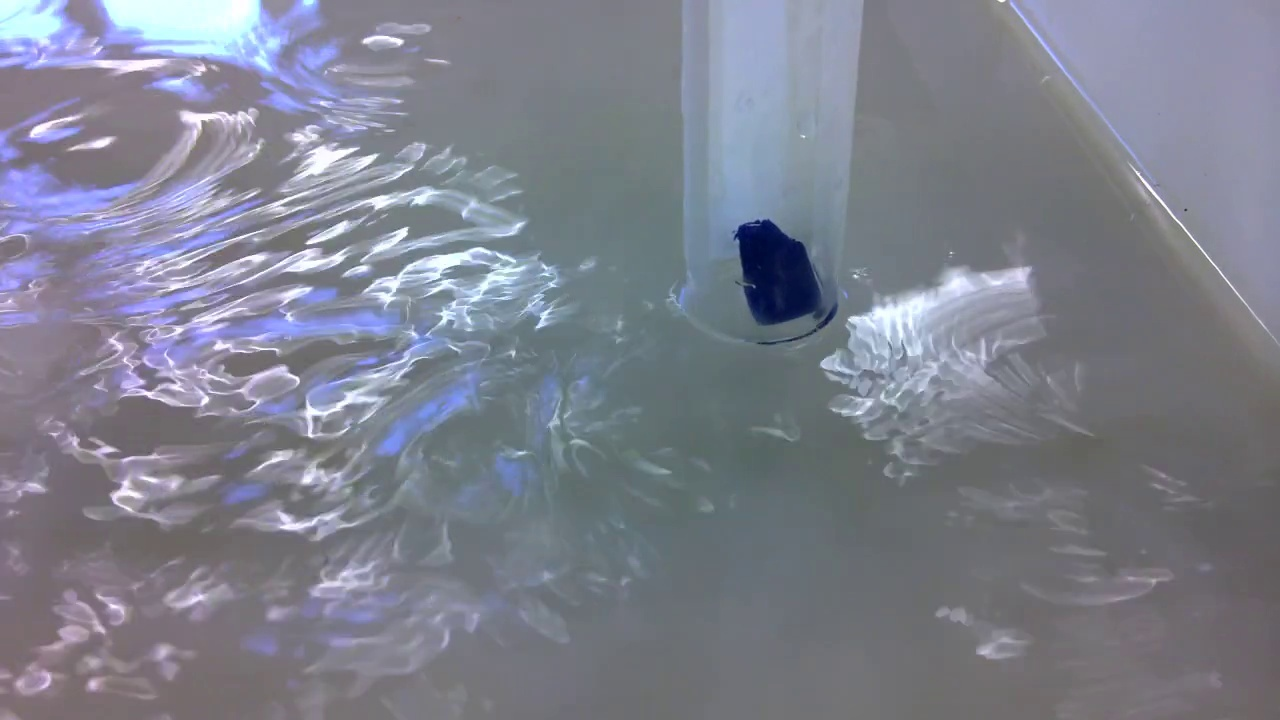

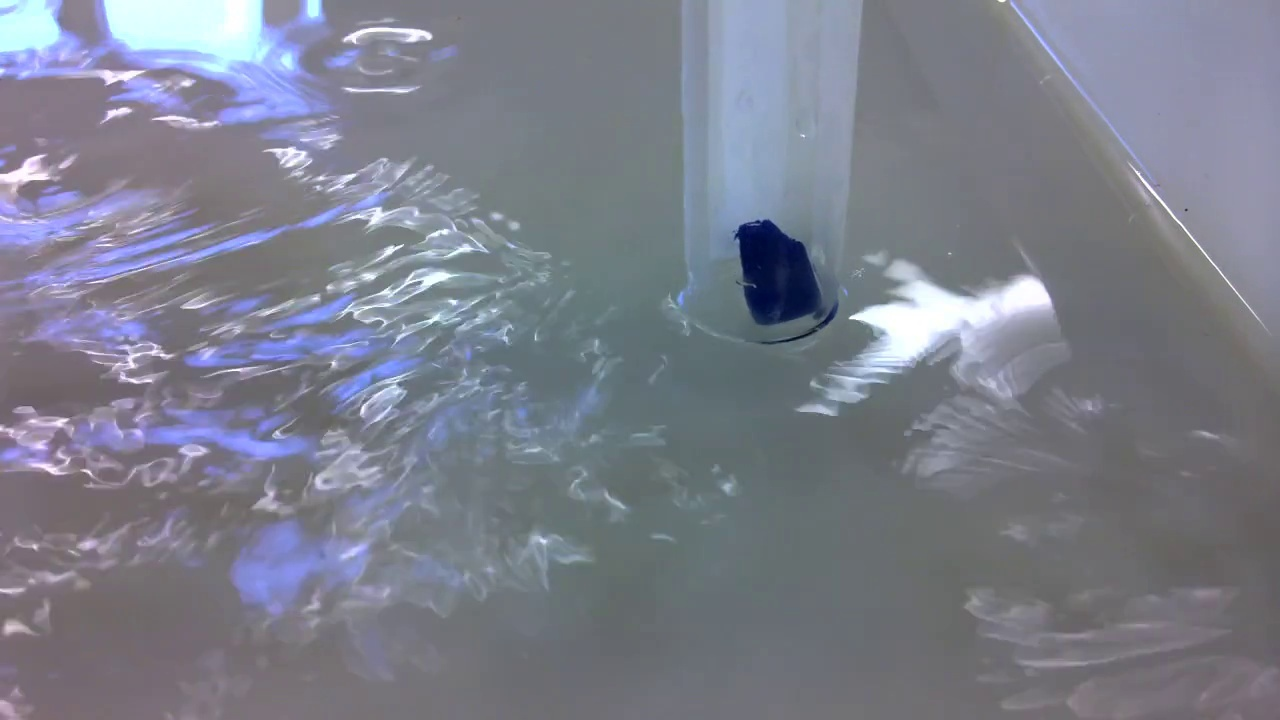

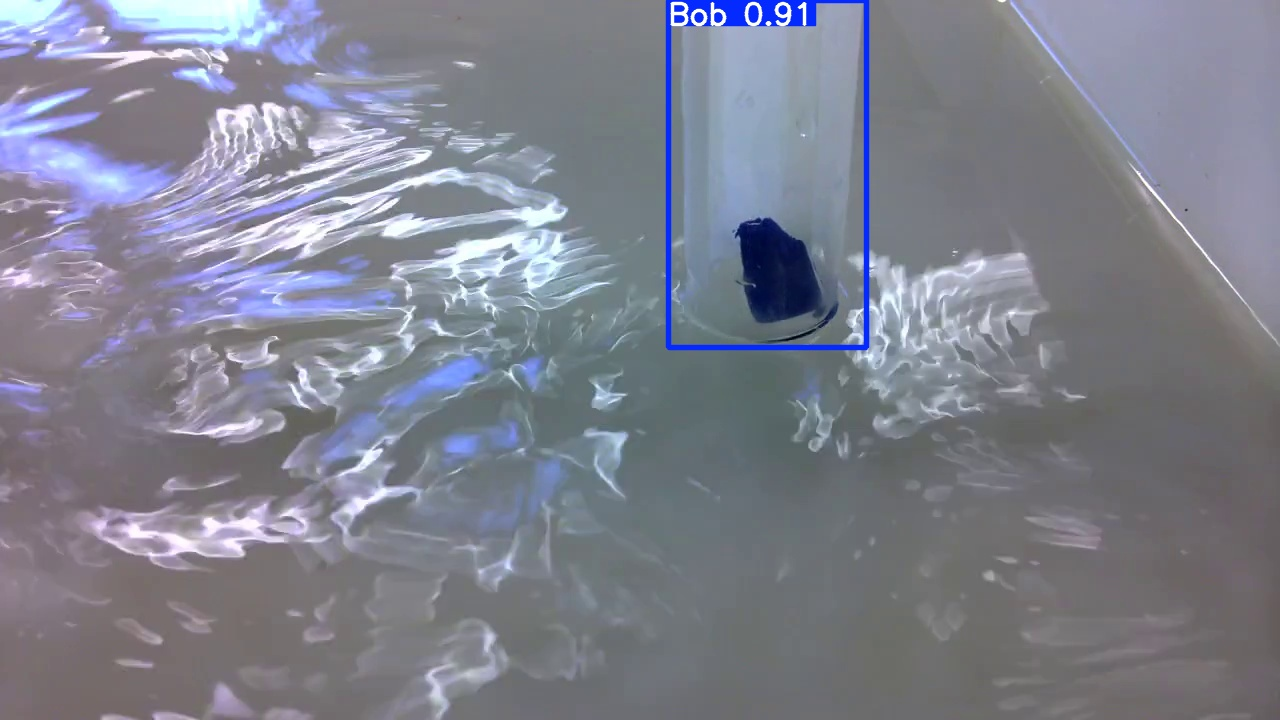

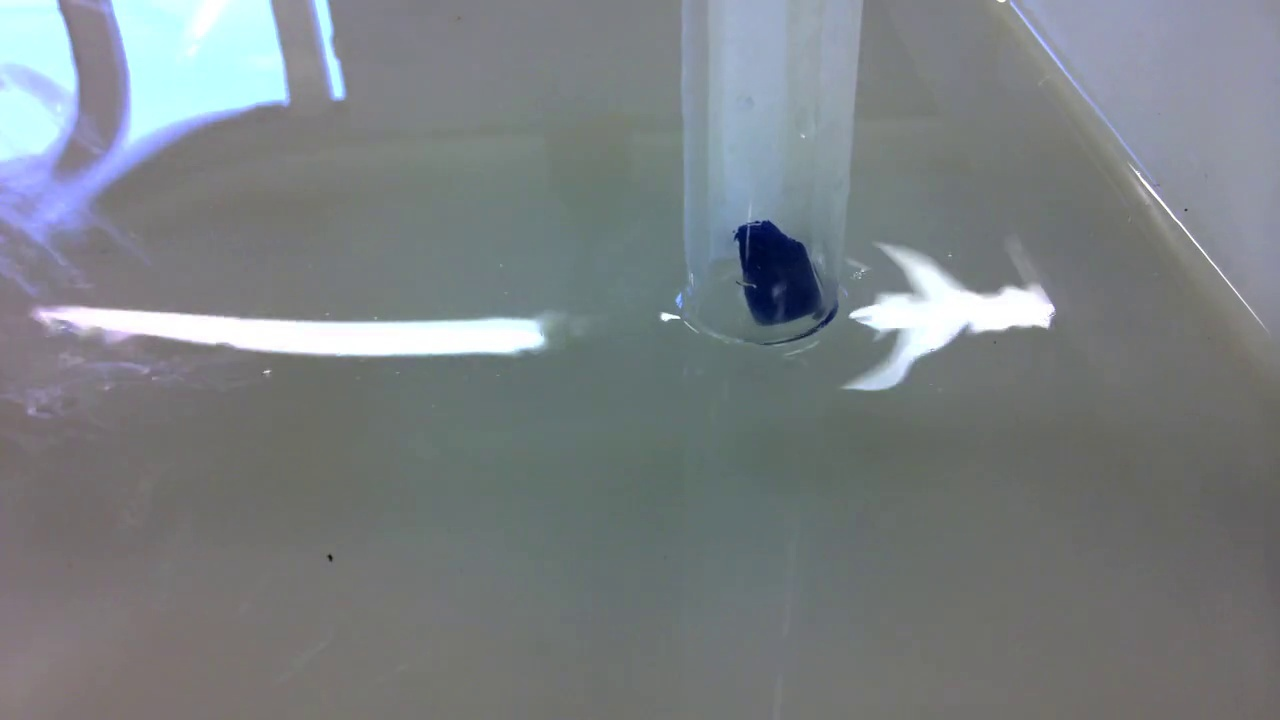

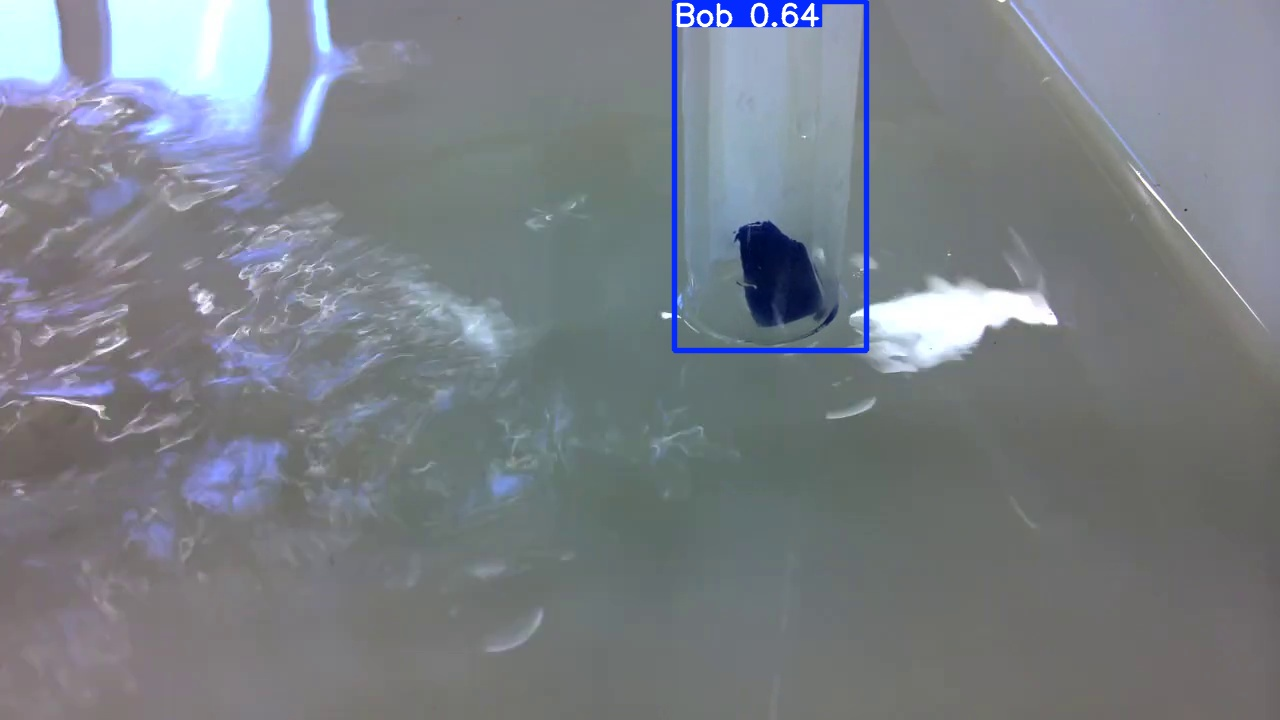

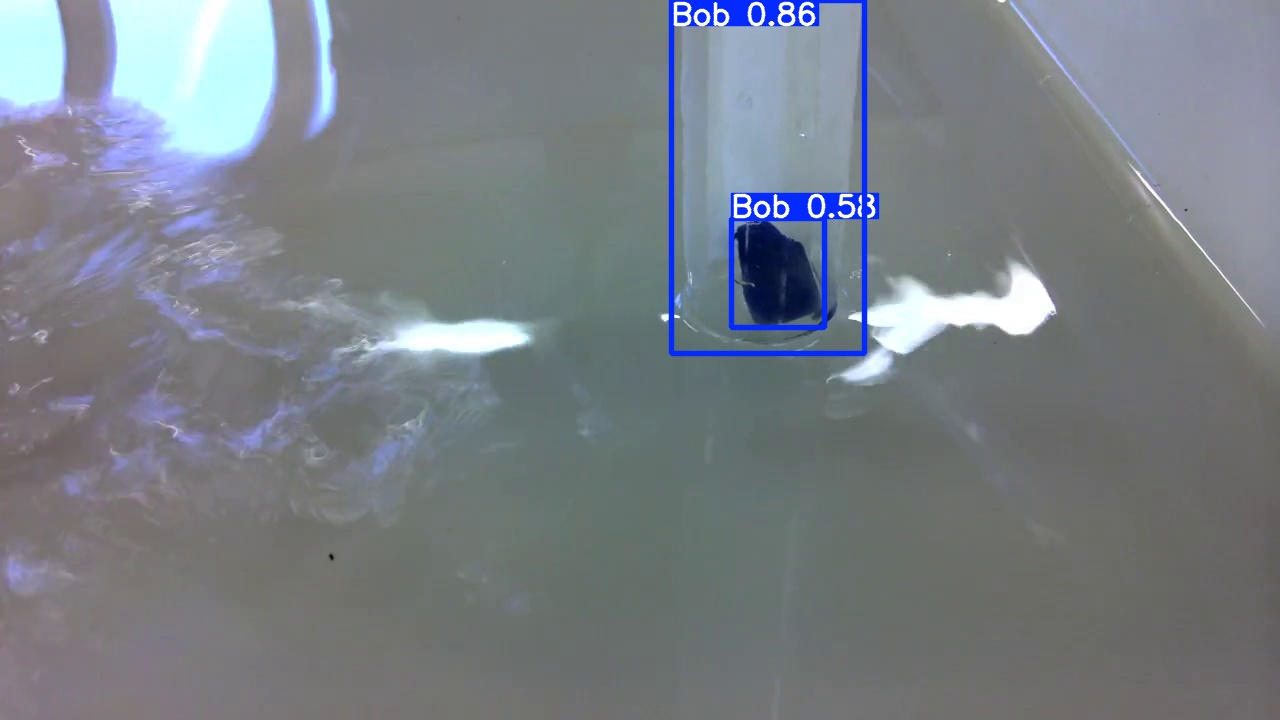

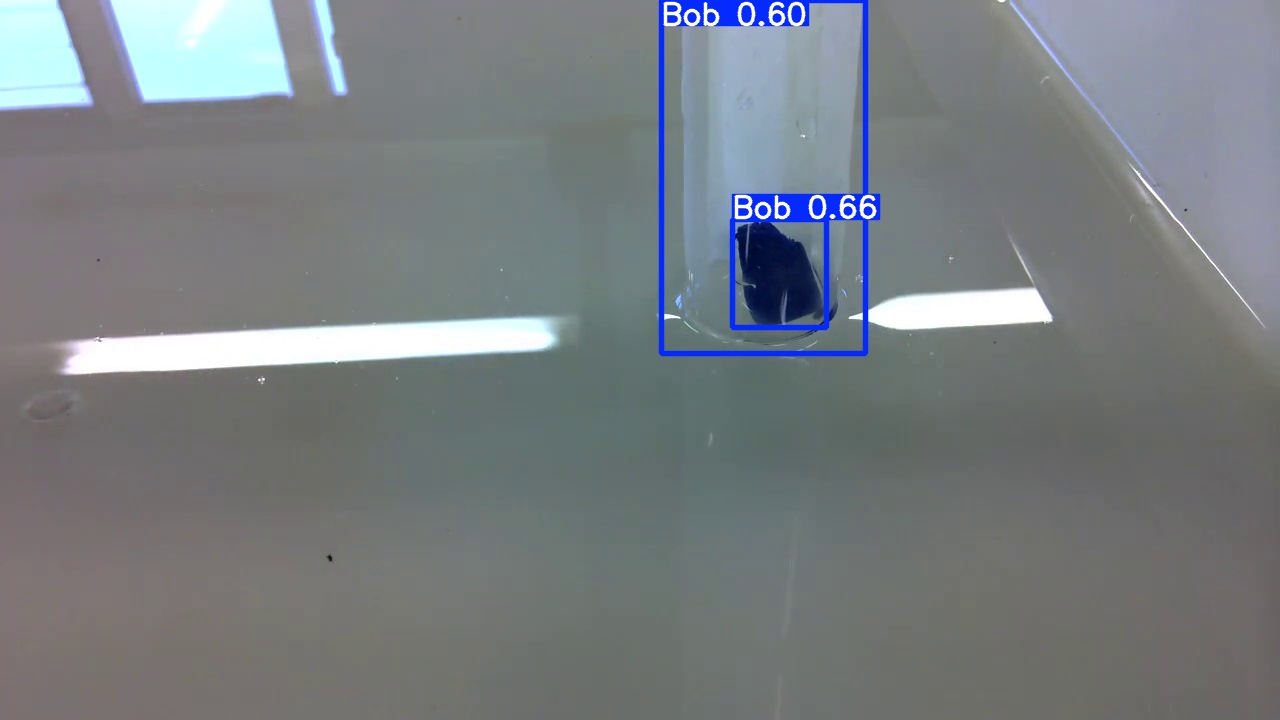

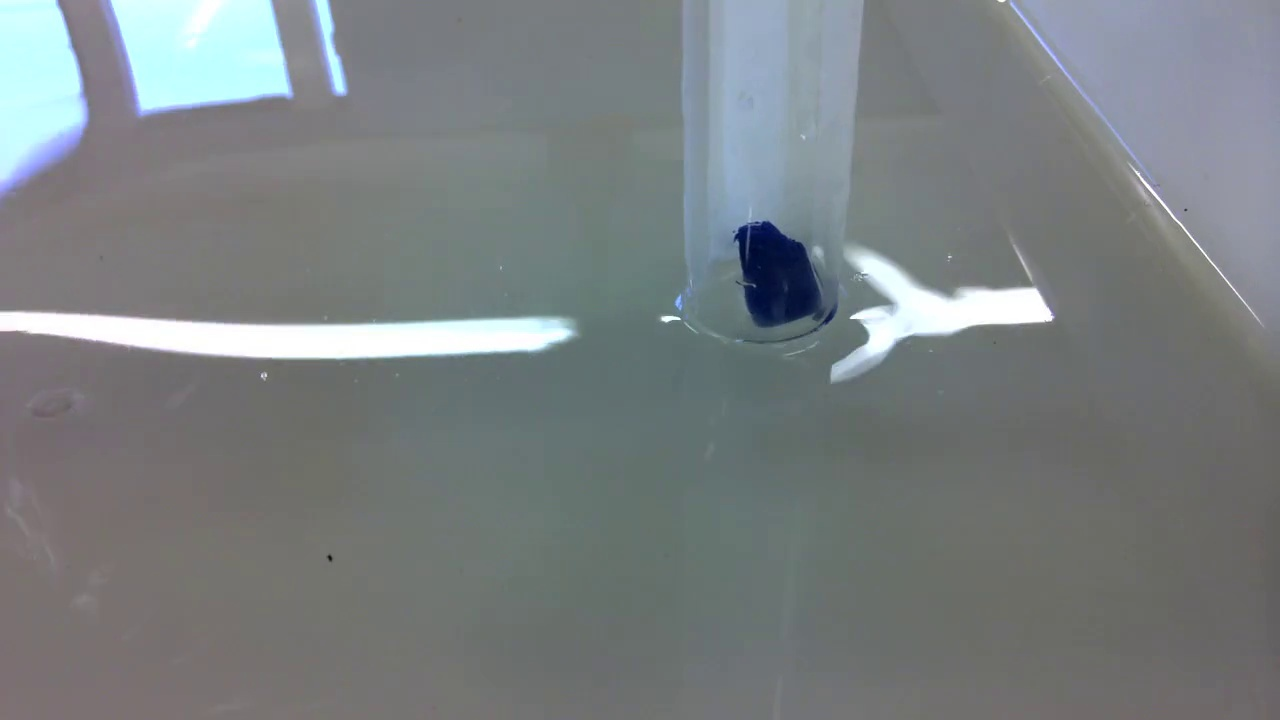

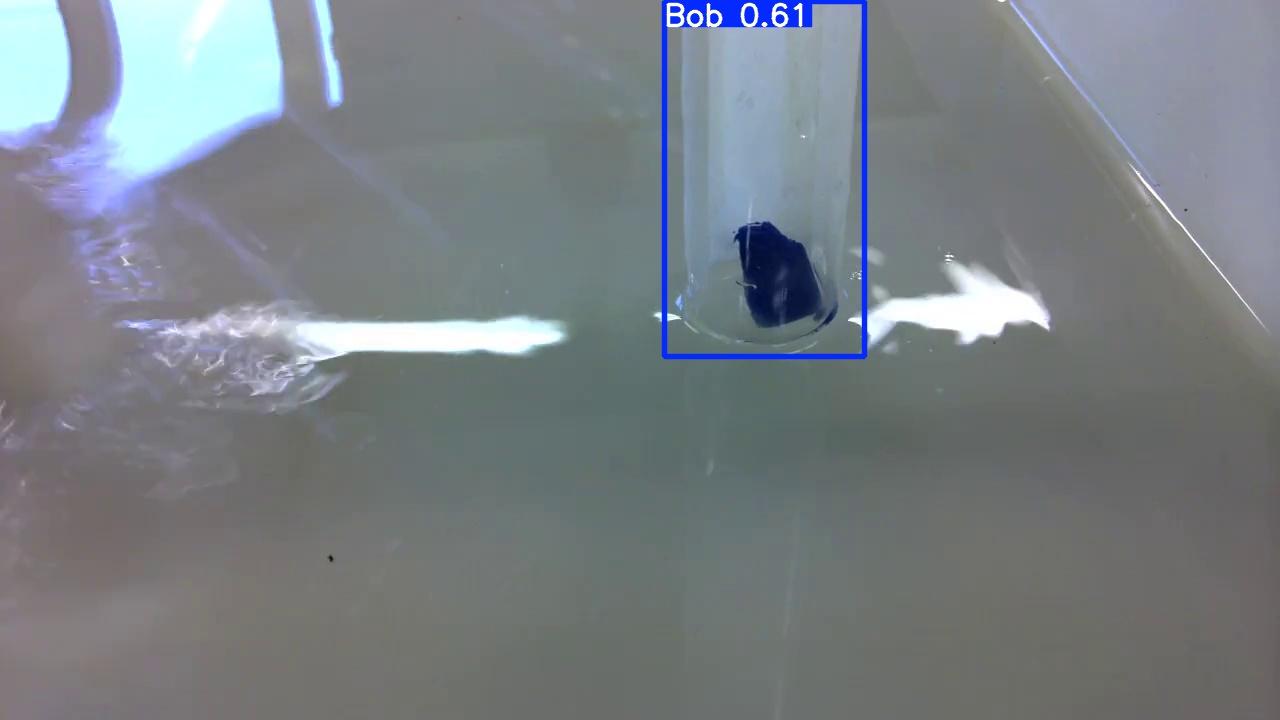

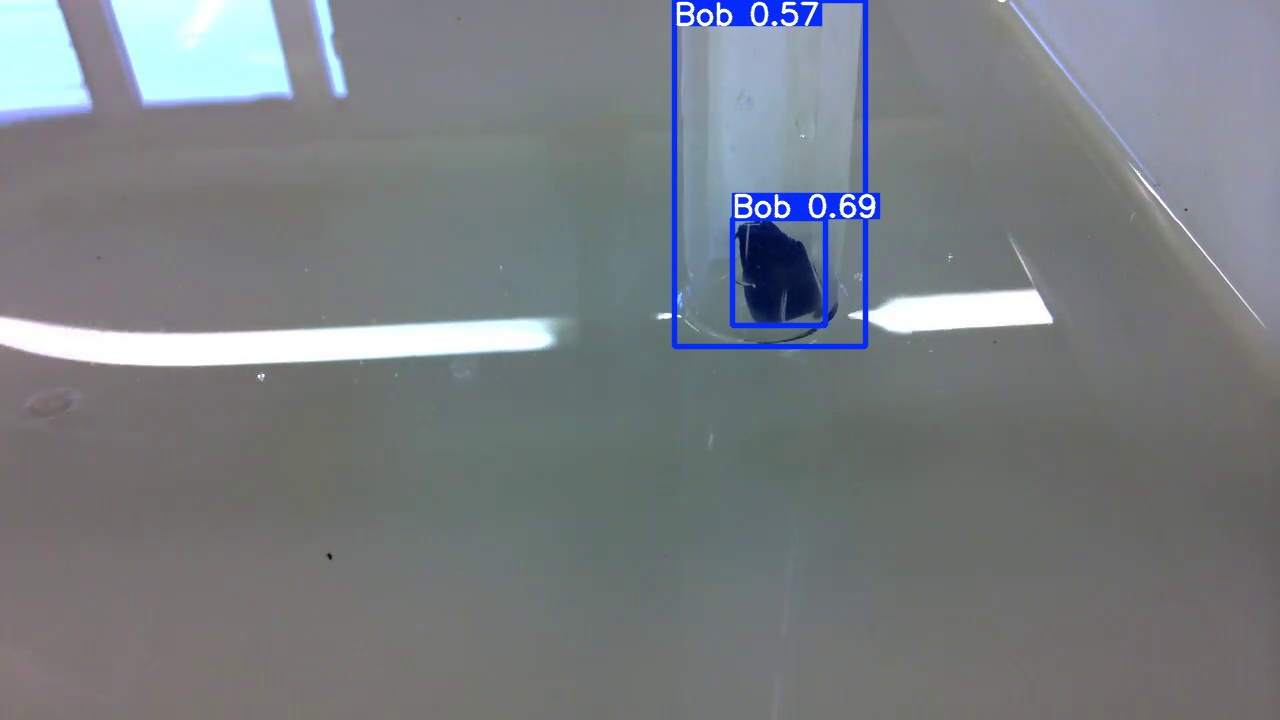

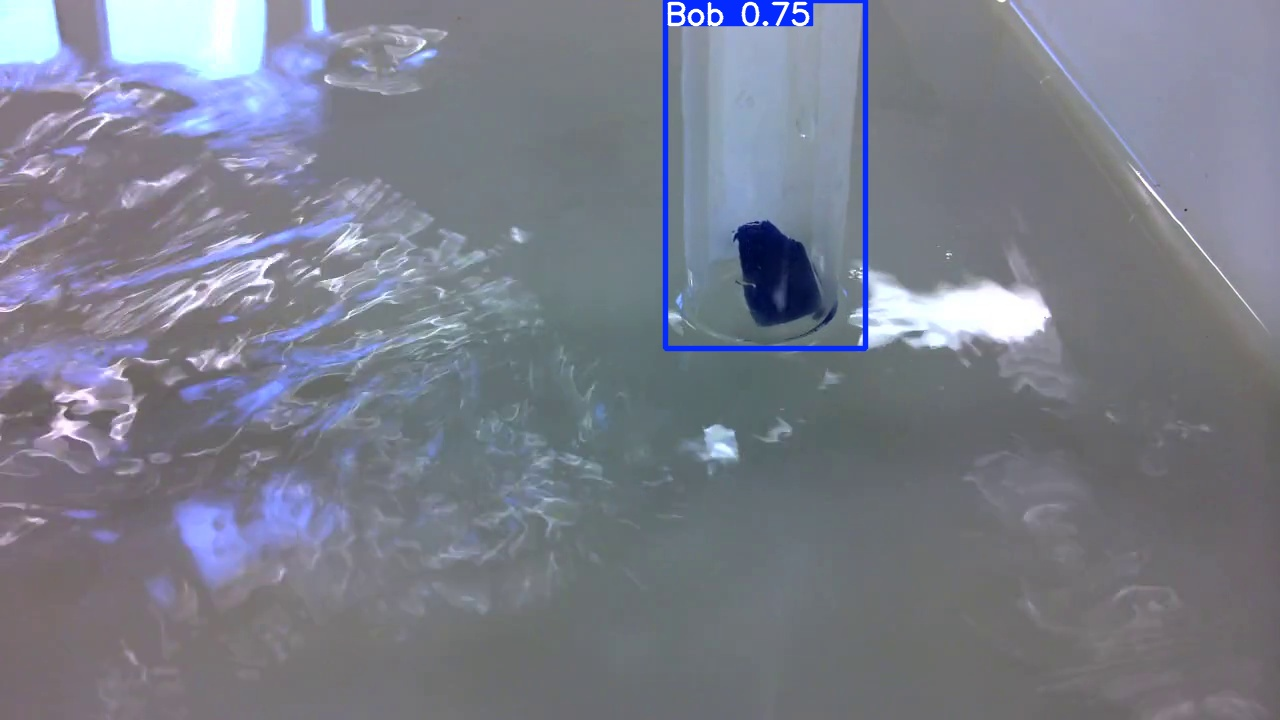

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")